In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных
data = pd.read_csv('./data/moscow_flats_dataset.csv')

data = data.drop(['link'], axis=1)

# Вывод первых 5 строк таблицы
print(data.head())

        price  min_to_metro region_of_moscow  total_area  living_area  floor  \
0  31633073.0          24.0              ЮАО        64.2         32.4   11.0   
1  29293000.0           9.0             СВАО        78.1          NaN    9.0   
2  30349669.0           5.0              ЮАО        72.4         33.6    3.0   
3  31845511.0          19.0              ЮАО        69.2          NaN    2.0   
4  38810000.0          27.0              ЗАО        66.9         24.8    9.0   

   number_of_floors  construction_year  is_new  is_apartments  ceiling_height  \
0              16.0             2023.0     1.0            0.0            3.15   
1              27.0             2022.0     1.0            0.0             NaN   
2              24.0             2023.0     1.0            0.0            3.15   
3              12.0             2024.0     1.0            0.0            2.97   
4              14.0             2023.0     1.0            0.0            3.00   

   number_of_rooms  
0          

In [2]:
#обработка пропущенных значений
print(data.shape)
data.isnull().sum()

(6983, 12)


price                  22
min_to_metro          137
region_of_moscow       91
total_area             23
living_area          2469
floor                  23
number_of_floors       23
construction_year    1222
is_new                 34
is_apartments          34
ceiling_height       1930
number_of_rooms         0
dtype: int64

In [3]:
#Уберем строки в которых нет значений, отсутствующих редко
data = data.dropna(subset=['price', 'is_new', 'is_apartments', 'floor', 'number_of_floors', 'total_area', 'region_of_moscow'])

In [4]:
print(data.shape)
data.isnull().sum()

(6881, 12)


price                   0
min_to_metro          112
region_of_moscow        0
total_area              0
living_area          2420
floor                   0
number_of_floors        0
construction_year    1187
is_new                  0
is_apartments           0
ceiling_height       1880
number_of_rooms         0
dtype: int64

In [5]:
print(type(data['min_to_metro'][0]))
print(type(data['living_area'][0]))
print(type(data['construction_year'][0]))
print(type(data['ceiling_height'][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [6]:
#остальные отсутствующие значения заменим средними
columns = ['min_to_metro', 'living_area', 'construction_year', 'ceiling_height']

for cur_col in columns: 
    mean_val = data[cur_col].mean()
    data[cur_col] = data[cur_col].fillna(mean_val)

In [7]:
print(data.shape)
data.isnull().sum()

(6881, 12)


price                0
min_to_metro         0
region_of_moscow     0
total_area           0
living_area          0
floor                0
number_of_floors     0
construction_year    0
is_new               0
is_apartments        0
ceiling_height       0
number_of_rooms      0
dtype: int64

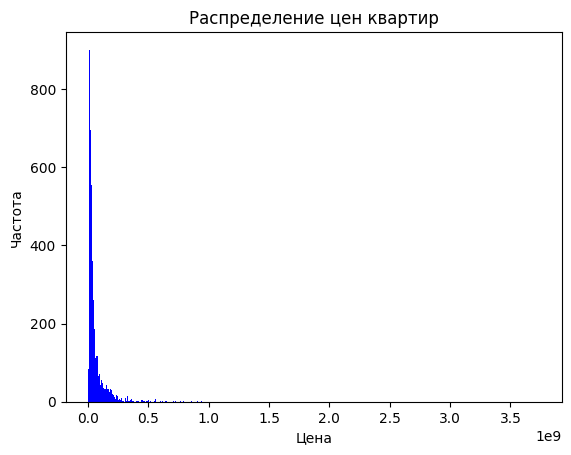

In [8]:
#исследуем распределение цен на квартиры и уберем слишком большие значения
plt.hist(data['price'], bins='auto', color='blue')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен квартир')
plt.show()

(5778, 12)


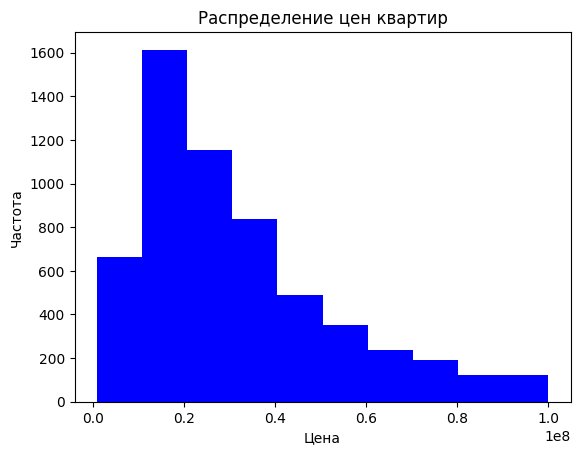

In [9]:
#ограничимся ценами до 100.000.000 руб
new = data[data['price'] < 1e8]
print(new.shape)

plt.hist(new['price'], bins=10, color='blue')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен квартир')
plt.show()

In [10]:
data = new.copy(deep=True)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'min_to_metro'}>,
        <Axes: title={'center': 'total_area'}>],
       [<Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'number_of_floors'}>],
       [<Axes: title={'center': 'construction_year'}>,
        <Axes: title={'center': 'ceiling_height'}>, <Axes: >]],
      dtype=object)

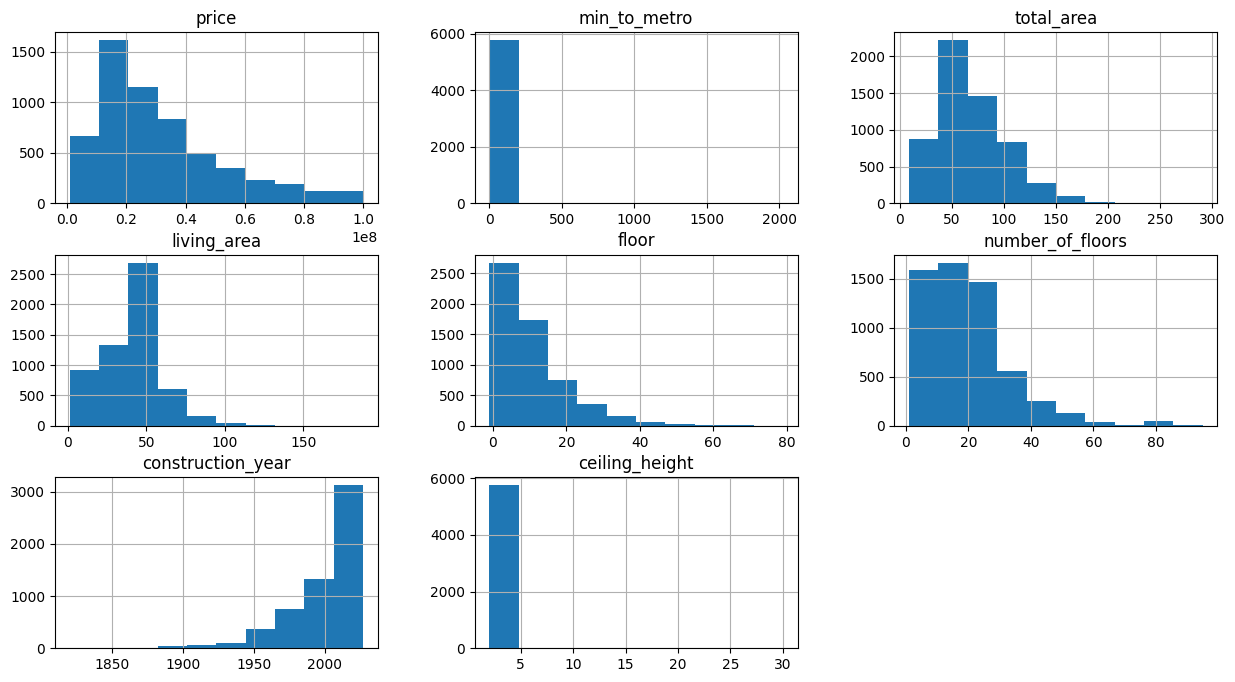

In [11]:
graph_data = data.copy(deep=True)
graph_data = graph_data.drop(['region_of_moscow', 'is_apartments', 'is_new', 'number_of_rooms'], axis=1)

graph_data.hist(figsize=(15, 8))


price                0
min_to_metro         0
region_of_moscow     0
total_area           0
living_area          0
floor                0
number_of_floors     0
construction_year    0
is_new               0
is_apartments        0
ceiling_height       0
number_of_rooms      0
living_area_ratio    0
average_room         0
highness             0
dtype: int64

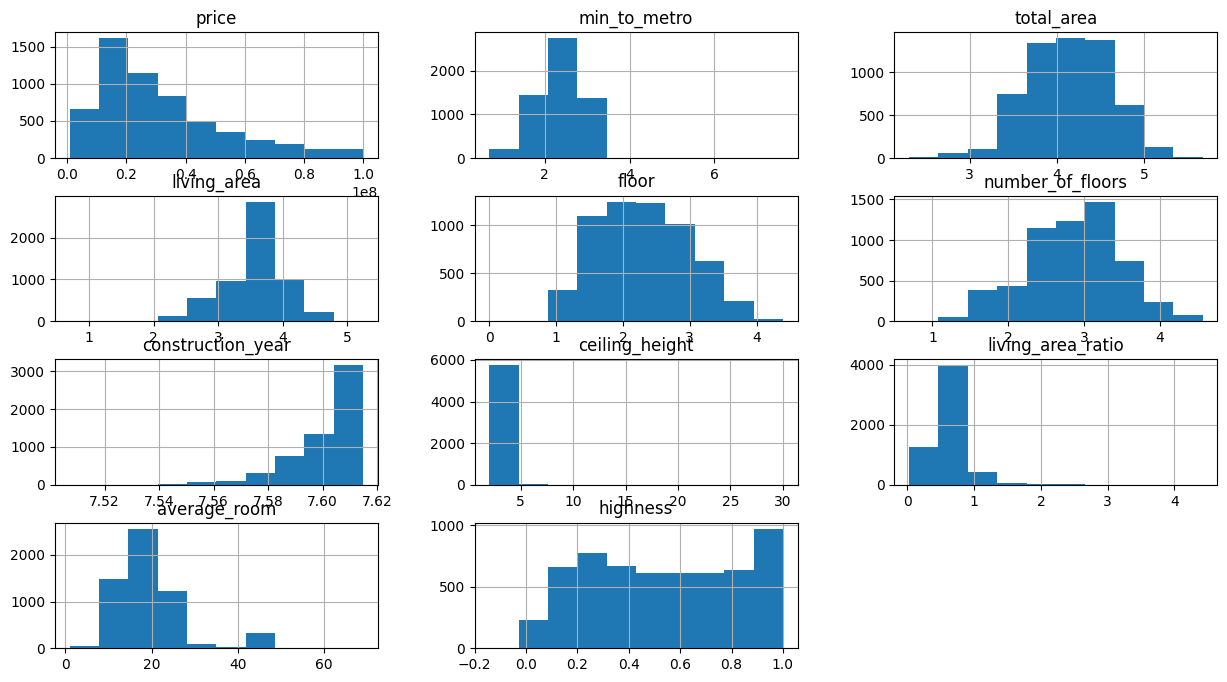

In [12]:


data['living_area_ratio'] = data['living_area'] / data['total_area']
data['average_room'] = data['living_area'] / data['number_of_rooms']
data['highness'] = data['floor'] / data['number_of_floors']
# data['is_close_to_metro'] = pd.DataFrame([(1.0 if list(data['min_to_metro'])[i] <= 5.0 else 0.1) for i in range(5778)], dtype=float)
# data['is_house_old'] = pd.DataFrame([(1.0 if list(data['construction_year'])[i] <= 1950.0 else 0.1) for i in range(5778)], dtype=float)

data['min_to_metro'] = np.log(data['min_to_metro'] + 1)
data['construction_year'] = np.log(data['construction_year'] + 1)
data['number_of_floors'] = np.log(data['number_of_floors'] + 1)
data['floor'] = np.log(data['floor'] + 2)
data['living_area'] = np.log(data['living_area'] + 1)
data['total_area'] = np.log(data['total_area'] + 1)

graph_data = data.copy(deep=True)
graph_data = graph_data.drop(['region_of_moscow', 'is_apartments', 'is_new', 'number_of_rooms'], axis=1)

graph_data.hist(figsize=(15, 8))
data.isnull().sum()

<Axes: >

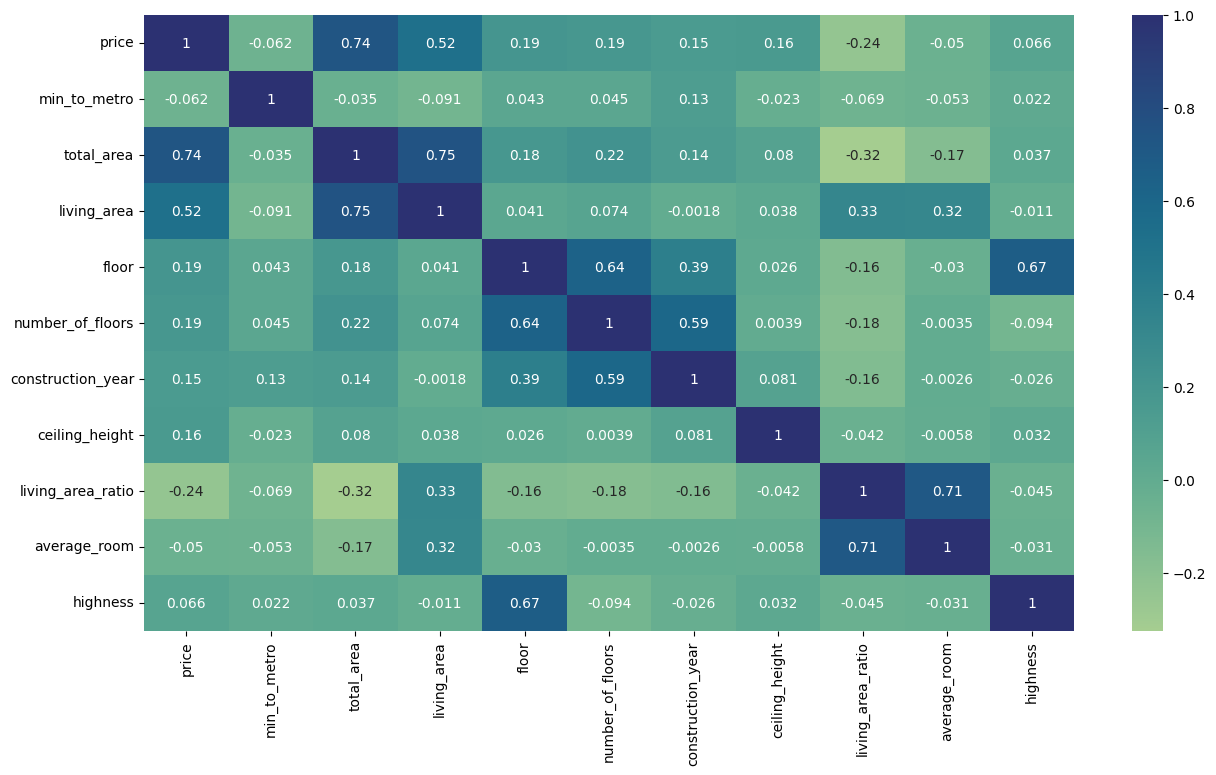

In [13]:
#Построим тепловую карту
plt.figure(figsize=(15, 8))
sns.heatmap(graph_data.corr(), annot=True, cmap="crest")

In [14]:
data = data.join(pd.get_dummies(data.region_of_moscow, dtype=float)).drop(['region_of_moscow'], axis=1)
data

,price,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,...,highness,ВАО,ЗАО,САО,СВАО,СЗАО,ЦАО,ЮАО,ЮВАО,ЮЗАО
0,31633073.0,3.218876,4.177459,3.508556,2.564949,2.833213,7.612831,1.0,0.0,3.150000,...,0.687500,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,29293000.0,2.302585,4.370713,3.831022,2.397895,3.332205,7.612337,1.0,0.0,3.035315,...,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,30349669.0,1.791759,4.295924,3.543854,1.609438,3.218876,7.612831,1.0,0.0,3.150000,...,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,31845511.0,2.995732,4.251348,3.831022,1.386294,2.564949,7.613325,1.0,0.0,2.970000,...,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,38810000.0,3.332205,4.218036,3.250374,2.397895,2.708050,7.612831,1.0,0.0,3.000000,...,0.642857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6976,15200000.0,2.833213,4.146304,3.831022,2.302585,2.302585,7.585789,0.0,0.0,2.640000,...,0.888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6977,29000000.0,1.945910,4.407938,4.074142,1.386294,2.302585,7.562681,0.0,0.0,3.200000,...,0.222222,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6978,29504877.0,1.945910,4.467057,3.921973,1.609438,2.564949,7.603008,0.0,0.0,3.035315,...,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6981,21500000.0,2.484907,4.555980,4.248495,1.386294,1.791759,7.603008,0.0,0.0,2.800000,...,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<Axes: >

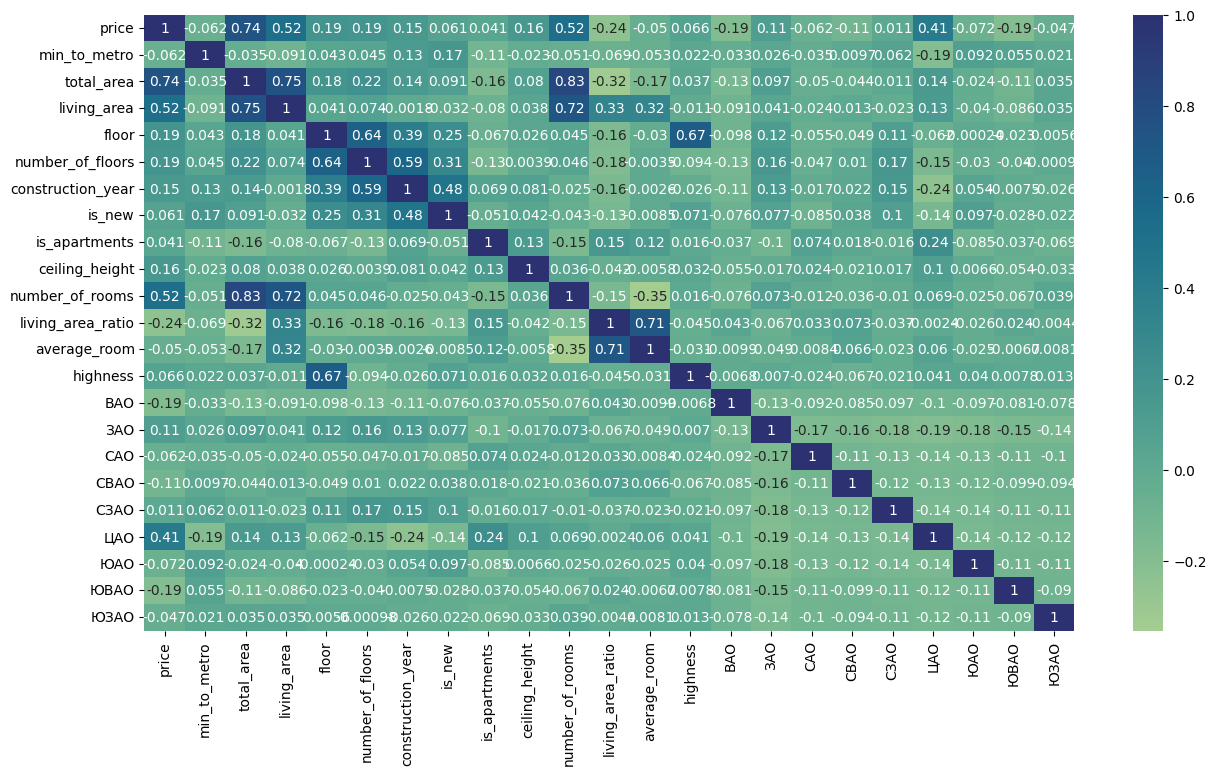

In [15]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="crest")

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = data.drop(['price'], axis=1), data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7059570126855654

In [31]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.429763644731896

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(n_estimators=300,random_state=0, learning_rate=0.27)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.27, n_estimators=300, random_state=0)

In [33]:
reg.score(X_test, y_test)

0.8248855149307502

In [34]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=119)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.8322853169435617

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring = "neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=119),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [400]:
best_forest = grid_search.best_estimator_

best_forest.score(X_test, y_test)

0.8319740187746294

In [401]:
print(best_forest)

RandomForestRegressor(n_estimators=200)


In [406]:
print(X[0:1])

   min_to_metro  total_area  living_area     floor  number_of_floors  \
0      3.218876    4.177459     3.508556  2.564949          2.833213   

   construction_year  is_new  is_apartments  ceiling_height  number_of_rooms  \
0           7.612831     1.0            0.0            3.15              2.0   

   ...  highness  ВАО  ЗАО  САО  СВАО  СЗАО  ЦАО  ЮАО  ЮВАО  ЮЗАО  
0  ...    0.6875  0.0  0.0  0.0   0.0   0.0  0.0  1.0   0.0   0.0  

[1 rows x 22 columns]


In [410]:
print(best_forest.predict(X[1202:1203]))
print(y[1202:1203])

[58696408.43]
1266    56000000.0
Name: price, dtype: float64
